In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load Viber data

In [42]:
with open('./android/viber/total_info.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

review_list = []
for line in d:
    rating, text, date, version = line[0].split("******")
    review_list.append([rating,text, date, version])
    
reviews = pd.DataFrame(review_list, columns = ['rating', 'text', 'date', 'version'])
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB


In [5]:
reviews.sample(30)

,rating,text,date,version
6122,5.0,especially because call be free even if they b...,2015-03-16,5.2.2.478
1850,5.0,fantastic . free where ever you call . quite a...,2015-01-19,5.2.1.36
2380,2.0,when i try to download it be sed no space in d...,2015-01-15,5.2.1.36
5504,3.0,his silliness too disappoint now s1 spit in th...,2015-03-21,5.2.2.478
5154,4.0,pretty good hear and tie or even a free app no...,2015-03-25,5.2.2.478
13141,5.0,recently i find application earn click on view...,2015-04-19,5.3.0.2339
7229,4.0,the call do not work well . the sound be delay .,2015-03-07,5.2.2.478
9738,3.0,but for q call quality be optimal both end of ...,2015-05-06,5.3.0.2339
15624,4.0,can not do video call on this phone panasonic ...,2015-04-09,5.3.0.2339
12087,2.0,i be that i can not enter .,2015-04-22,5.3.0.2339


In [72]:
# Subset bad reviews (3, 2 or 1 star)
bad_reviews = reviews.loc[reviews['rating'].isin(['1.0','2.0','3.0'])]

# CountVectorizer

In [83]:
# apply thresholds to reduce number of tokens
vectorizer = CountVectorizer(max_df = 0.5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(reviews.text)
doc_term_matrix

<137008x11284 sparse matrix of type '<class 'numpy.int64'>'
	with 1106960 stored elements in Compressed Sparse Row format>

In [84]:
doc_term_matrix.shape

(137008, 11284)

In [85]:
words = vectorizer.get_feature_names()
words[0:20]

['00',
 '002010095966',
 '00pm',
 '01',
 '01212393581',
 '02',
 '03',
 '031',
 '04',
 '05',
 '06',
 '070',
 '10',
 '100',
 '100mb',
 '100raz',
 '101',
 '1014',
 '1020',
 '104']

In [38]:
# convert scipy compressed sparse row matrix to sparse Df
# most words are missing in documents
doc_term_matrix_df = pd.SparseDataFrame(doc_term_matrix, columns = words)
doc_term_matrix_df.head()

,00,002010095966,00pm,01,01212393581,02,03,031,04,05,...,zrihtate,zte,ztrhli,zvetover,zvlnit,zvonakmi,zvoni,zvonki,zvonyat,zyednyuyetsya
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# most frequent words
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
pd.Series(word_freq_1d, index = words).div(
    reviews.shape[0]).sort_values().tail(10)

viber      0.200455
app        0.158297
message    0.123438
good       0.119409
work       0.113979
use        0.113628
update     0.102593
video      0.102359
send       0.100549
phone      0.097221
dtype: float64

In [92]:
# use CountVectorizer with Lemmatization to clean up
import spacy
nlp = spacy.load('en_core_web_sm')
def tokenizer(doc):
    return [w.lemma_ for w in nlp(doc)
               if not w.is_punct | w.is_space]



In [94]:
vectorizer = CountVectorizer(tokenizer = tokenizer, binary = True)
doc_term_matrix = vectorizer.fit_transform(reviews.text)
doc_term_matrix.shape


(137008, 11342)

In [99]:
lemmatized_words = vectorizer.get_feature_names()
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = lemmatized_words).div(reviews.shape[0])
word_freq_1d.sort_values().tail(20)

for       0.140255
of        0.141189
this      0.144225
app       0.147553
can       0.158823
in        0.160283
good      0.160867
viber     0.162385
have      0.168457
but       0.194441
do        0.203842
call      0.213360
a         0.233505
not       0.326404
to        0.356125
and       0.359045
i         0.407684
the       0.448266
be        0.463097
-PRON-    0.631730
dtype: float64

## TFidVectorizer()
- returns the least number of terms, and also very fast.

In [6]:
tfidf = TfidfVectorizer()
doc_term_matrix = tfidf.fit_transform(reviews.text)
doc_term_matrix.shape

(17126, 11555)

In [7]:
words = tfidf.get_feature_names()
word_freq = doc_term_matrix.sum(axis=0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = words)
word_freq_1d.sort_values().tail(20)

very      368.717344
for       375.805785
this      379.471831
you       388.498180
in        393.265264
app       397.370575
good      412.374947
can       417.633822
have      419.876227
viber     429.204053
my        440.452764
but       468.506429
do        504.075696
call      612.975312
not       726.273131
and       746.058852
to        777.446831
be        959.474882
it        971.340154
the      1026.398791
dtype: float64

# Implementing LSA 

In [8]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB
None


In [27]:
# Count by version
pd.Series(reviews.version).value_counts()

5.3.0.2339    7635
5.2.2.478     3872
5.2.1.36      2389
5.2.1.26      1455
5.3.0.2331     675
5.3.0.2274     655
5.4.0.2519     394
5.2.2.463       51
Name: version, dtype: int64

In [29]:
# vectorize train and test sets
vectorizer = CountVectorizer(max_df = .2,
                             min_df = 3,
                             stop_words = 'english')
reviews_dtm = vectorizer.fit_transform(reviews.text)
words = vectorizer.get_feature_names()
reviews_dtm

<17126x3109 sparse matrix of type '<class 'numpy.int64'>'
	with 128722 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.decomposition import TruncatedSVD
# assign 15 different topics
svd = TruncatedSVD(n_components = 15,
                  n_iter = 20,
                  random_state = 42)
svd.fit(reviews_dtm)

TruncatedSVD(algorithm='randomized', n_components=15, n_iter=20,
       random_state=42, tol=0.0)

In [37]:
topics = pd.DataFrame(svd.components_.T,
                     index = words)
topics.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
00,0.000755,0.000510,-0.000291,0.000474,-0.000957,0.000022,-0.000479,0.000514,0.000586,-0.000683,-0.000254,-0.000099,0.001251,-0.000386,1.068067e-03
01,0.000306,-0.000082,0.000545,-0.000090,-0.000203,0.000623,-0.000436,-0.000338,0.000485,-0.000317,0.000002,-0.000498,0.000926,0.000365,1.707389e-07
02,0.000265,-0.000453,0.000223,-0.000212,0.000184,0.000292,0.000007,0.000330,0.000611,-0.000249,0.000395,0.000289,0.000175,0.000082,6.606659e-05
03,0.000098,-0.000088,0.000006,-0.000529,-0.000304,0.000255,-0.000330,0.000321,-0.000661,0.000877,0.000320,-0.000217,0.000040,0.000099,3.361204e-05
04,0.000498,-0.000331,0.001112,0.000180,-0.000034,0.000177,-0.000543,-0.000430,0.000219,-0.000078,0.000037,-0.000376,0.001036,-0.000408,3.105434e-04


In [38]:
# very hard to make sense of what the topic actually is
# Also really hard to know how many topics there are, what should T be?
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,viber,viber,message,app,good,update,use,video,send,work,free,time,application,send,fix
1,app,number,send,message,video,fix,video,send,sticker,send,sticker,fix,time,time,problem
2,message,contact,update,viber,message,work,phone,work,download,use,great,sticker,quot,phone,application
3,use,code,fix,love,viber,new,send,app,code,code,download,download,39,contact,39
4,phone,phone,code,send,send,video,ca,viber,update,time,application,problem,video,photo,like
5,send,say,receive,free,use,problem,message,code,fix,try,39,video,like,picture,great
6,work,activate,new,notification,voice,version,app,fix,time,sticker,just,voice,contact,update,send
7,update,account,time,best,quality,latest,easy,file,video,download,work,message,great,work,contact
8,fix,tablet,phone,text,free,sticker,galaxy,make,quot,connection,like,phone,problem,like,star
9,time,use,number,open,love,ca,apps,picture,photo,activation,make,try,write,file,voice


# LDA

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
lda_base = LatentDirichletAllocation(n_components=15,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [54]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words)
topics.sample(20)

(15, 3109)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
hope,0.000183,0.002083,0.000754,0.000006,0.001674,0.002668,0.004986,0.000786,0.000009,0.000010,0.001612,0.000595,0.000007,0.000007,0.000006
platform,0.000009,0.000029,0.000006,0.000006,0.000007,0.000309,0.000006,0.000634,0.000009,0.000010,0.000445,0.000006,0.000168,0.000007,0.000006
manager,0.000009,0.000005,0.000006,0.000006,0.000007,0.000162,0.000006,0.000007,0.000009,0.000010,0.000009,0.000006,0.000007,0.000147,0.000147
static,0.000009,0.000005,0.000657,0.000006,0.000007,0.000010,0.000006,0.000007,0.000452,0.000010,0.000009,0.000006,0.000007,0.000007,0.000006
major,0.000009,0.000380,0.000006,0.000006,0.000007,0.000010,0.000238,0.000177,0.000009,0.000010,0.000146,0.000006,0.000007,0.000007,0.000006
choppy,0.000009,0.000005,0.001342,0.000006,0.000007,0.000010,0.000006,0.000007,0.000009,0.000010,0.000009,0.000006,0.000007,0.000007,0.000006
vids,0.000009,0.000005,0.000006,0.000006,0.000007,0.000010,0.000102,0.000007,0.000009,0.000010,0.000009,0.000006,0.000007,0.000330,0.000006
taxi,0.000009,0.000005,0.000006,0.000006,0.000007,0.000010,0.000006,0.000525,0.000009,0.000010,0.000009,0.000006,0.000007,0.000007,0.000006
rich,0.000009,0.000005,0.000006,0.000006,0.000007,0.000010,0.000006,0.000007,0.000009,0.000010,0.000009,0.000006,0.000007,0.000007,0.000255
mend,0.000009,0.000103,0.000006,0.000006,0.000007,0.000010,0.000006,0.000481,0.000009,0.000010,0.000557,0.000006,0.000130,0.000007,0.000006


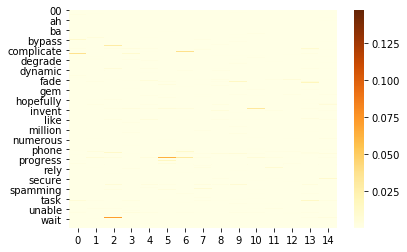

In [67]:
# terms vs topics. Some terms are more respresentative
# of each topic but it is still not clear what is the topic
sns.heatmap(topics,cmap="YlOrBr")

In [69]:
top_10_words = {}
for topic, words_ in topics.items():
    top_10_words[topic] = words_.nlargest(10).index.tolist()
pd.DataFrame(top_10_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,sticker,update,video,39,use,problem,viber,viber,work,program,quot,code,download,app,message
1,make,new,voice,free,love,work,thank,phone,video,add,like,number,sticker,good,send
2,friend,fix,quality,application,viber,video,connect,contact,stop,like,internet,come,picture,send,time
3,free,version,good,super,app,chat,fix,number,viber,memory,bad,error,photo,great,notification
4,cool,turn,sound,good,great,great,problem,tablet,update,feature,galaxy,enter,send,like,viber
5,app,viber,clear,recommend,easy,fine,app,use,phone,space,samsung,send,open,file,receive
6,chat,old,hear,great,good,camera,online,account,android,bs,connection,write,change,video,slow
7,love,latest,bad,best,phone,wi,help,time,remove,download,application,sm,background,need,come
8,family,vibration,excellent,just,work,fi,say,save,option,necessary,app,say,load,better,update
9,good,vibrate,make,app,apps,public,time,people,ok,developer,phone,try,time,text,second


In [78]:
# Test LDA with only bad reviews
bad_reviews_dtm = vectorizer.fit_transform(bad_reviews.text)
words_bad_reviews = vectorizer.get_feature_names()
bad_reviews_dtm
lda_base = LatentDirichletAllocation(n_components=15,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(bad_reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [81]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(30)

(15, 2050)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cartoonish,0.000016,0.000015,0.000013,0.000019,0.000016,0.000009,0.000010,0.000015,0.000015,0.000012,0.000012,0.000011,0.000014,0.000020,0.000584
evry,0.000016,0.000015,0.000013,0.000019,0.000016,0.000009,0.000010,0.000455,0.000015,0.000012,0.000012,0.000352,0.000014,0.000020,0.000013
dazhe,0.000016,0.000015,0.000013,0.000019,0.000016,0.000271,0.000159,0.000015,0.000015,0.000012,0.000012,0.000011,0.000014,0.000020,0.000013
bluetooth,0.000016,0.000015,0.000013,0.000345,0.000016,0.000009,0.000010,0.000015,0.000015,0.000012,0.000012,0.004242,0.000014,0.000020,0.000013
act,0.000016,0.000015,0.000013,0.000687,0.000016,0.000009,0.000108,0.000015,0.000689,0.000012,0.000012,0.000011,0.000014,0.000020,0.000013
texting,0.000016,0.000015,0.000746,0.000019,0.000016,0.000009,0.000010,0.000015,0.000015,0.000432,0.000908,0.000011,0.000014,0.000652,0.000013
factory,0.000016,0.000021,0.000013,0.000019,0.000016,0.000009,0.000241,0.001430,0.000015,0.000012,0.000012,0.000011,0.000014,0.000020,0.000013
appendix,0.000256,0.001535,0.000013,0.000019,0.000016,0.000009,0.000010,0.000015,0.000015,0.000012,0.000229,0.000011,0.000014,0.000020,0.000013
hd,0.000016,0.000015,0.000013,0.000019,0.000016,0.000009,0.000010,0.000015,0.000015,0.000012,0.000012,0.000011,0.000014,0.000918,0.000013
retry,0.000016,0.000015,0.000013,0.001159,0.000016,0.000009,0.000010,0.000015,0.000015,0.000012,0.000012,0.000011,0.000014,0.000020,0.000013


In [88]:
# Grouping topics by bad reviews seem much better than putting everything.
# but still hard to make sense of the topic
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,viber,video,app,tablet,update,code,fix,background,connection,sticker,send,message,good,better,contact
1,stop,work,viber,phone,version,number,viber,change,hear,download,message,turn,quality,program,new
2,work,use,message,viber,quot,come,app,screen,internet,open,photo,update,voice,viber,viber
3,use,fix,notification,chat,latest,enter,message,time,work,picture,application,phone,video,block,update
4,phone,make,make,credit,upgrade,send,update,try,wifi,load,voice,vibrate,like,lot,old
5,instal,ca,use,galaxy,contact,write,pls,camera,problem,time,update,vibration,bad,way,add
6,android,problem,phone,free,constantly,phone,online,chat,person,fix,minute,notification,app,know,account
7,app,properly,option,samsung,say,sm,time,work,voice,send,39,viber,sound,communication,use
8,crash,samsung,really,group,need,error,use,phone,talk,update,time,receive,time,whatsapp,delete
9,application,help,feature,buy,application,say,send,day,network,app,bad,connect,poor,skype,like


In [155]:
# retrain until perplexity no longer decreases
lda_opt = LatentDirichletAllocation(n_components = 10,
                                   n_jobs=-1,
                                   max_iter = 500,
                                   learning_method = 'batch',
                                   evaluate_every = 5,
                                   verbose = 1,
                                   random_state = 42)

lda_opt.fit(bad_reviews_dtm)

iteration: 1 of max_iter: 500
iteration: 2 of max_iter: 500
iteration: 3 of max_iter: 500
iteration: 4 of max_iter: 500
iteration: 5 of max_iter: 500, perplexity: 701.8322
iteration: 6 of max_iter: 500
iteration: 7 of max_iter: 500
iteration: 8 of max_iter: 500
iteration: 9 of max_iter: 500
iteration: 10 of max_iter: 500, perplexity: 655.0642
iteration: 11 of max_iter: 500
iteration: 12 of max_iter: 500
iteration: 13 of max_iter: 500
iteration: 14 of max_iter: 500
iteration: 15 of max_iter: 500, perplexity: 642.3567
iteration: 16 of max_iter: 500
iteration: 17 of max_iter: 500
iteration: 18 of max_iter: 500
iteration: 19 of max_iter: 500
iteration: 20 of max_iter: 500, perplexity: 637.3668
iteration: 21 of max_iter: 500
iteration: 22 of max_iter: 500
iteration: 23 of max_iter: 500
iteration: 24 of max_iter: 500
iteration: 25 of max_iter: 500, perplexity: 634.8340
iteration: 26 of max_iter: 500
iteration: 27 of max_iter: 500
iteration: 28 of max_iter: 500
iteration: 29 of max_iter: 500


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_components=10, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [157]:
topics_count = lda_opt.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(10)

(10, 2050)


,0,1,2,3,4,5,6,7,8,9
ut,0.000312,0.000019,0.000009,0.000014,0.000014,0.000019,0.000013,0.000013,0.000019,0.000013
inscription,0.000010,0.000019,0.000009,0.000297,0.000014,0.000019,0.000013,0.000013,0.000019,0.000268
wifi,0.001957,0.000019,0.000009,0.000014,0.000014,0.005994,0.015684,0.000013,0.000019,0.000013
shift,0.000010,0.000019,0.000009,0.000863,0.000014,0.000019,0.000013,0.000013,0.000019,0.000013
input,0.000010,0.000019,0.000009,0.000014,0.000390,0.000019,0.000013,0.000013,0.002718,0.000013
tone,0.000135,0.000019,0.000283,0.000014,0.000014,0.000019,0.000013,0.000013,0.002210,0.000013
worst,0.001016,0.000019,0.000790,0.000014,0.000014,0.002279,0.000013,0.002556,0.000019,0.000013
couple,0.000517,0.000019,0.000009,0.000014,0.000014,0.000019,0.000013,0.002842,0.000019,0.000201
compact,0.000010,0.000019,0.000009,0.000014,0.000014,0.000019,0.000932,0.000013,0.000019,0.000013
kan,0.000010,0.000019,0.000009,0.000439,0.000014,0.000019,0.000013,0.000013,0.000019,0.000013


In [158]:
# doesn't appear to be very different
top_15_words = {}
for topic, words_ in topics.items():
    top_15_words[topic] = words_.nlargest(15).index.tolist()
pd.DataFrame(top_15_words)

,0,1,2,3,4,5,6,7,8,9
0,video,hear,message,say,phone,sticker,new,work,code,contact
1,use,39,update,fix,number,download,update,viber,come,send
2,viber,sound,fix,try,write,free,connection,app,send,picture
3,make,voice,viber,viber,application,load,version,use,sm,photo
4,voice,notification,send,help,quot,update,good,stop,activation,time
5,phone,miss,receive,problem,enter,app,network,chat,receive,change
6,quality,talk,app,error,tablet,credit,better,just,wait,viber
7,like,person,time,time,error,open,quality,open,enter,background
8,app,bad,turn,upgrade,correct,use,work,properly,digit,message
9,good,time,notification,install,39,time,old,fix,activate,delete


In [159]:
bad_reviews_preds = lda_opt.transform(bad_reviews_dtm)
bad_reviews_preds.shape

(8205, 10)

In [160]:
# reviews with high probability of being in topic 1
bad_reviews_eval = pd.DataFrame(bad_reviews_preds,
                               index = bad_reviews.text)
bad_reviews_eval[bad_reviews_eval[1]>0.3]

,0,1,2,3,4,5,6,7,8,9
text,,,,,,,,,,
but one big but it 39 . s video call .,0.276682,0.523298,0.025000,0.025000,0.025001,0.025001,0.025002,0.025008,0.025001,0.025005
"the sound be horrible when i be on call , it either high pitch scratchy tone when the other contact be talk or i cant hear anything at all but the other contact can still hear me talk . the worst of all be that i keep get non stop miss call notification , and when i ask the contact they say they only miss call me once . so why do viber do that ? it use up too much of my phone s cpu and drain the battery .",0.364947,0.351249,0.003572,0.090863,0.003572,0.003572,0.003572,0.003573,0.003575,0.171504
"every day i try call out it go black on scree , unable to access screen for a future 5 min . miss call be n't get any notification , also message be really frustrate do type when your type and hang or completely come out of msg , need to be more compatible with sony z1 compact .",0.004001,0.369149,0.063113,0.151782,0.004000,0.004000,0.168356,0.227596,0.004002,0.004001
very good but due to bad network it sometimes cut unaware .,0.020002,0.491931,0.020000,0.020000,0.020000,0.020000,0.348065,0.020001,0.020000,0.020000
great app on desktop . great on phone if you chat with only 1 person . lately can even chat with even 1 person .,0.009093,0.375577,0.009092,0.009092,0.009093,0.009091,0.009091,0.551688,0.009091,0.009093
it s ok but sometimes can not listen clear voice .,0.020009,0.419995,0.020001,0.020003,0.020000,0.020000,0.020002,0.419986,0.020001,0.020001
"hang up , hang up . whats this ? message deliver after more than 10 sec . each msg deliver multiple time . new update be just fuck up . i think the only reason ppl be stick to it be just the sticker . thats it .",0.004348,0.476013,0.384217,0.004348,0.004348,0.109330,0.004349,0.004349,0.004348,0.004348
1 . frequent voice break 2 . frequent disconnection 3 . voice lag 4 . unable to see usb internet connection and show network connection unavailable .,0.007144,0.358387,0.007143,0.133914,0.007143,0.007144,0.457697,0.007143,0.007143,0.007143
great that you guy have video call now but the video lag every few minute . the sound call itself be very decent .,0.429342,0.481765,0.011112,0.011111,0.011111,0.011112,0.011111,0.011112,0.011112,0.011112


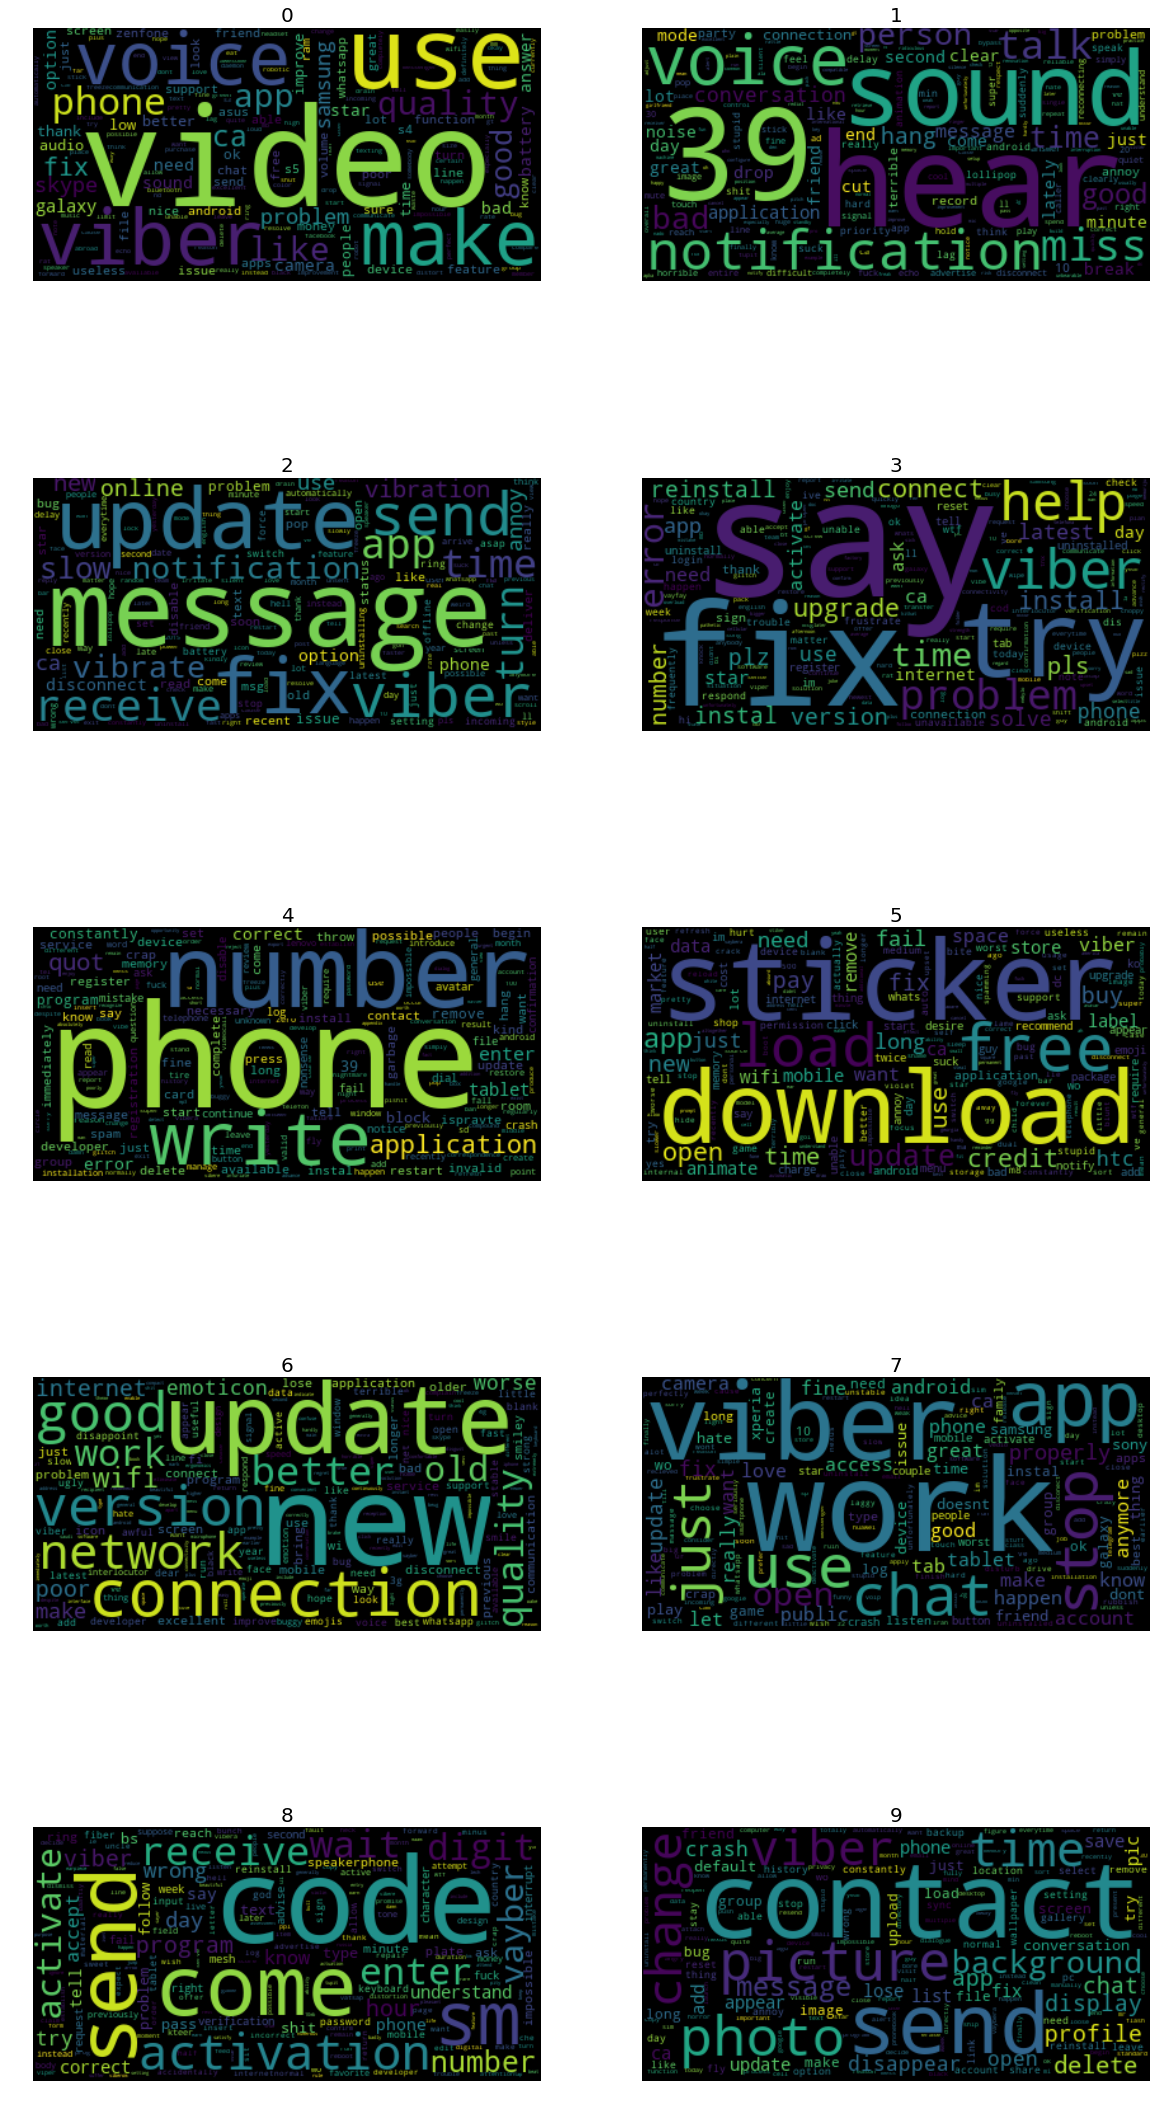

In [163]:
# word clouds by topic 
topics_prob = lda_opt.components_ / lda_opt.components_.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=vectorizer.get_feature_names())

from wordcloud import WordCloud
w = WordCloud()
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,40))
axes = axes.flatten()
for t, (topic,freq) in enumerate(topics.items()):
    w.generate_from_frequencies(freq.to_dict())
    axes[t].imshow(w, interpolation='bilinear')
    axes[t].set_title(topic, fontsize=20)
    axes[t].axis('off')
